# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_auc_score,roc_curve


In [ ]:
train = pd.read_csv('/content/SalaryData_Train.csv')
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Exploratory Data Analysis**

In [ ]:
train.shape

(30161, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [ ]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [ ]:
for i in train.columns:
  print("\n", i, "\n", train[i].unique())


 age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]

 workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

 education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

 educationno 
 [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

 maritalstatus 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

 occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Force

In [ ]:
train.drop('native',axis = 1, inplace = True)
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


# **Correlation Matrix**

In [ ]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


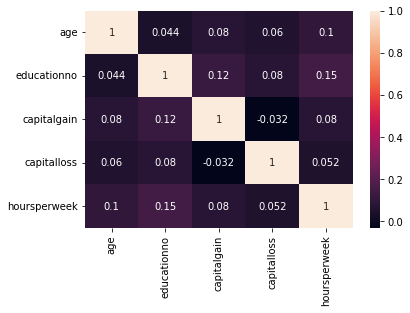

In [ ]:
sns.heatmap(train.corr(), annot = True)

In [ ]:
# Loop for getting categorical data
for col in train.columns:
  if train[col].dtype == 'object':
    print(col)

workclass
education
maritalstatus
occupation
relationship
race
sex
Salary


In [ ]:
# Loop for getting Continuous data
for col in train.columns:
  if train[col].dtype != 'object':
    print(col)

age
educationno
capitalgain
capitalloss
hoursperweek


In [ ]:
Continuous = ['age','educationno','capitalgain','capitalloss','hoursperweek']
Category = ['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'Salary']

# **Distribution of Continuous**

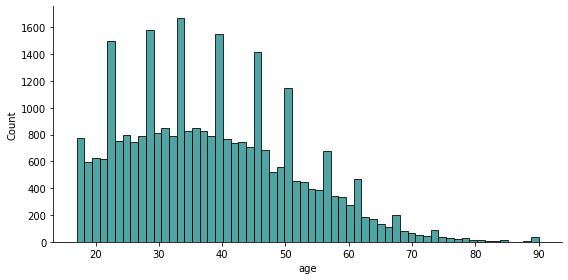

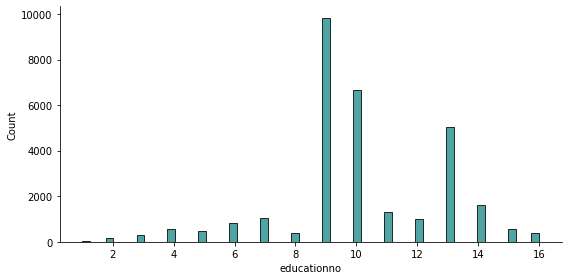

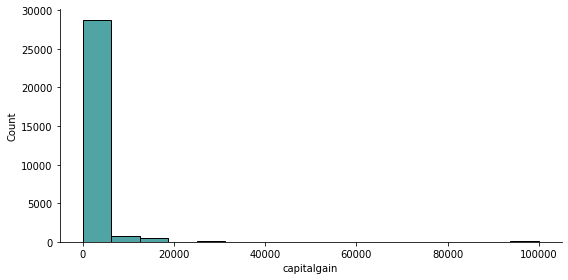

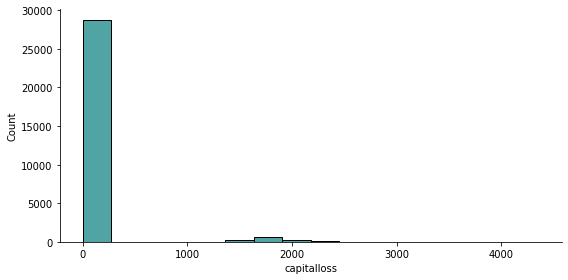

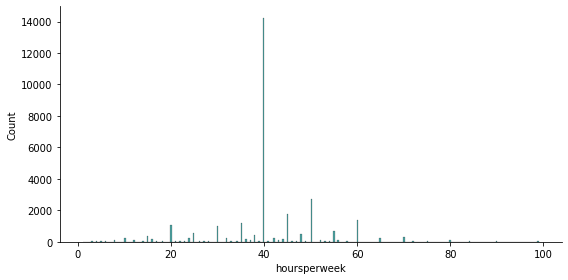

In [ ]:
for feature in Continuous:
  sns.displot(data=train, x=feature, height=4, aspect=2, color = '#158685')
  plt.show()

# **Distribution of Category**

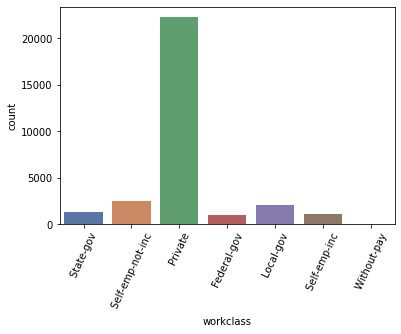

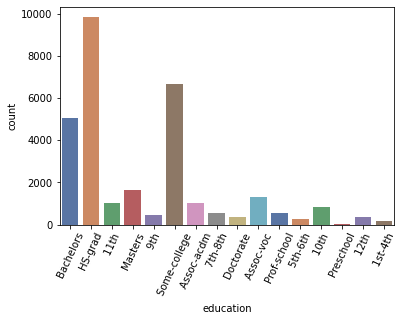

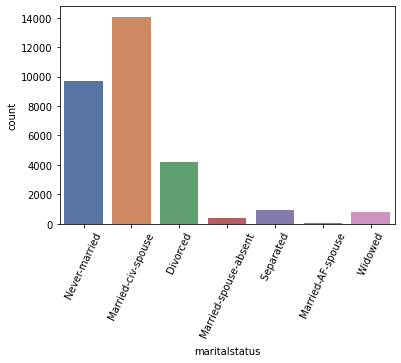

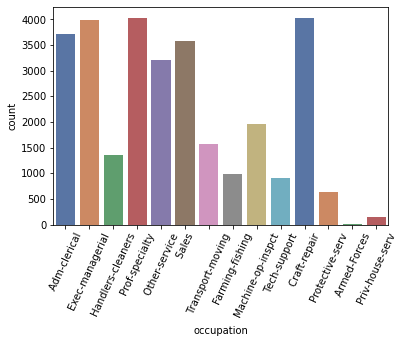

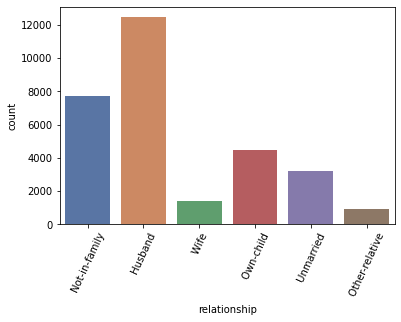

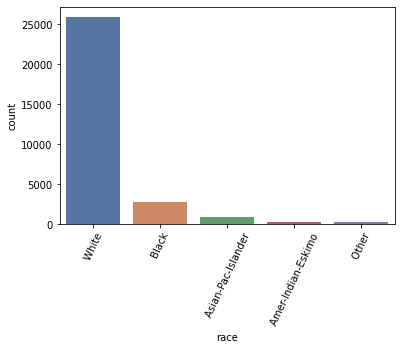

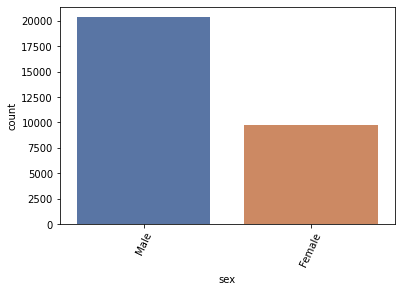

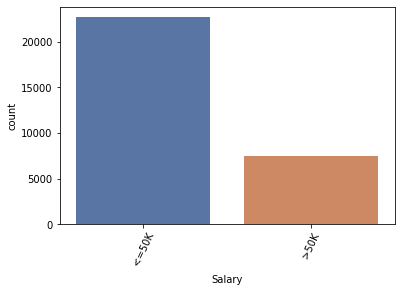

In [ ]:
for feature in Category:
  sns.countplot(data = train, x=feature, palette = 'deep')
  plt.xticks(rotation=65)
  plt.show()

# **Box Plot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


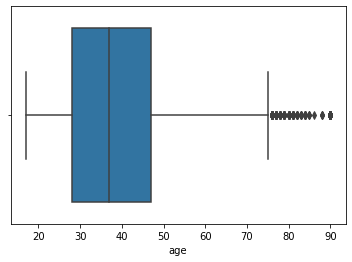

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


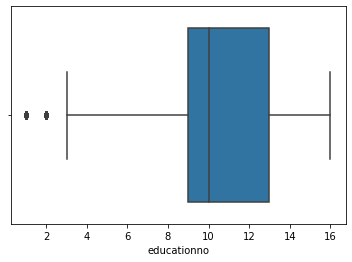

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


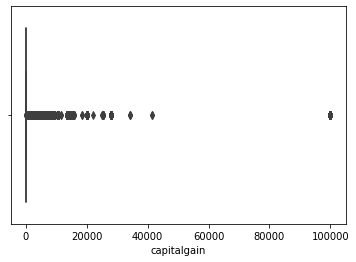

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


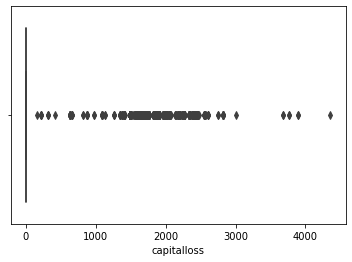

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


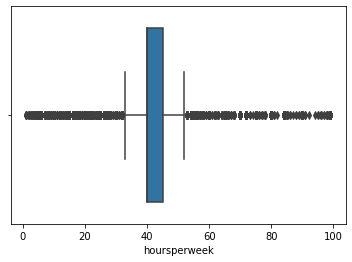

In [ ]:
for feature in Continuous:
  sns.boxplot(train[feature])
  plt.show()

# **Distplot**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


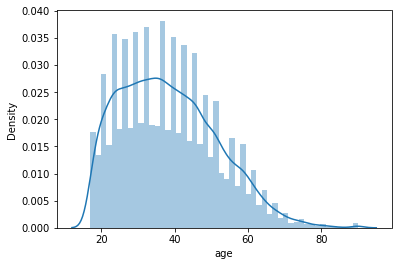

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


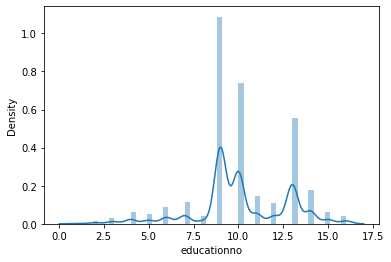

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


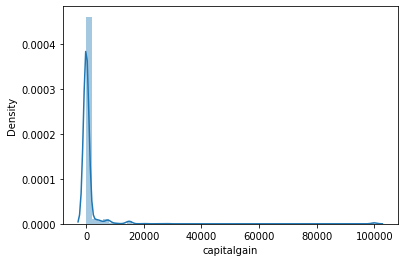

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


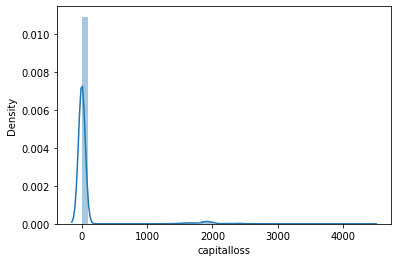

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


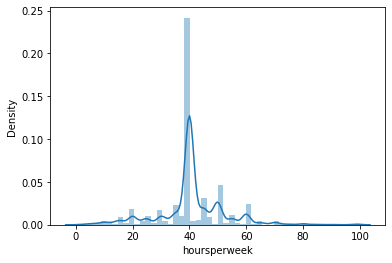

In [ ]:
for feature in Continuous:
  sns.distplot(train[feature])
  plt.show()

# **Violin Plot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


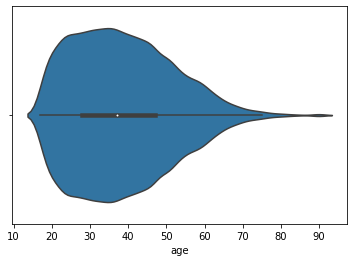

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


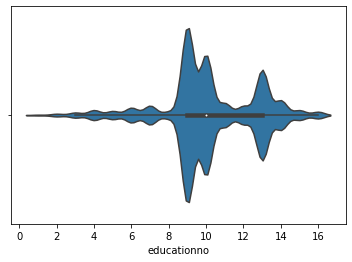

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


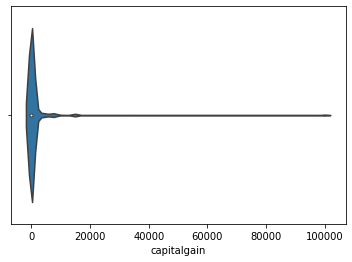

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


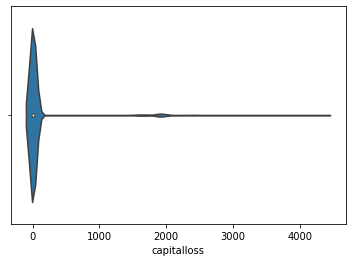

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


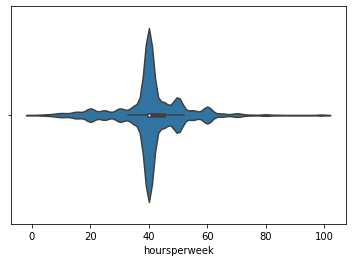

In [ ]:
for feature in Continuous:
  sns.violinplot(train[feature])
  plt.show()

# **Encoding the Categorical Variable**

In [ ]:
# Loop for Label Encoding
for col in Category:
  le = LabelEncoder()
  le.fit(train[col])
  train[col] = le.transform(train[col])

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [ ]:
train['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

We can see that salary <=50K has more observations and >50K has less observations.

Here the data is imbalanced.

# **Scaling the Data**

In [ ]:
scaler = MinMaxScaler()
model = scaler.fit(train)
scaled_data = model.transform(train)

In [ ]:
scaled_data

array([[0.30136986, 0.83333333, 0.6       , ..., 0.        , 0.39795918,
        0.        ],
       [0.45205479, 0.66666667, 0.6       , ..., 0.        , 0.12244898,
        0.        ],
       [0.28767123, 0.33333333, 0.73333333, ..., 0.        , 0.39795918,
        0.        ],
       ...,
       [0.56164384, 0.33333333, 0.73333333, ..., 0.        , 0.39795918,
        0.        ],
       [0.06849315, 0.33333333, 0.73333333, ..., 0.        , 0.19387755,
        0.        ],
       [0.47945205, 0.5       , 0.73333333, ..., 0.        , 0.39795918,
        1.        ]])

In [ ]:
train1 = pd.DataFrame(scaled_data, columns = train.columns)
train1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.0


# **Defining Independent and Dependent Variable**

In [ ]:
X = train1.drop('Salary',axis = 1)
Y = train1.iloc[:,-1]

In [ ]:
X.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959


In [ ]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Salary, dtype: float64

In [ ]:
X.shape,Y.shape

((30161, 12), (30161,))

# **Balancing the data by Smote**

In [ ]:
Y.value_counts()

0.0    22653
1.0     7508
Name: Salary, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')

oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

Y.value_counts()

0.0    22653
1.0    22653
Name: Salary, dtype: int64

Now, here the data is balanced and we can move further.

# **Splitting the data into Training and Testing dataset**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
33506,0.328247,0.333333,1.000000,0.600000,0.333333,1.000000,0.0,1.0,1.0,0.0,0.000000,0.480366
23464,0.136986,0.333333,0.733333,0.533333,0.333333,0.538462,1.0,1.0,0.0,0.0,0.000000,0.397959
42762,0.288395,0.333333,0.733333,0.533333,0.333333,0.000000,0.0,1.0,1.0,0.0,0.000000,0.446283
19926,0.109589,0.333333,0.466667,0.733333,0.666667,0.000000,0.8,1.0,0.0,0.0,0.000000,0.397959
28735,0.410959,0.833333,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.0,0.000000,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...
27822,0.383562,0.500000,1.000000,0.600000,0.333333,0.307692,0.0,1.0,1.0,0.0,0.000000,0.500000
40271,0.421300,0.333333,0.600000,0.800000,0.333333,0.197021,0.0,1.0,1.0,0.0,0.435128,0.500000
1388,0.109589,0.333333,1.000000,0.600000,0.500000,0.692308,0.8,0.5,1.0,0.0,0.000000,0.397959
19397,0.219178,0.333333,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.0,0.000000,0.500000


# **Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB

# Multinomial Naive Bayes

#Model Train
classifier_mb = MB()

#Model Test 

# Model Accuracy on train set
train_pred_m = classifier_mb.fit(X_train,y_train).predict(X_train)
accuracy_train_m = np.mean(train_pred_m == y_train)

# Model Accuracy on test set

test_pred_m = classifier_mb.fit(X_train,y_train).predict(X_test)
accuracy_test_m = np.mean(test_pred_m == y_test)

In [ ]:
accuracy_train_m

0.7297408084757521

In [ ]:
accuracy_test_m

0.7279281930547381

In [ ]:
test_pred_m

array([1., 0., 1., ..., 0., 1., 1.])

# **Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB as GB

# Gaussian Naive Bayes

#Model Train
classifier_gb = GB()

#Model Test 

# Model Accuracy on train set

train_pred_g = classifier_gb.fit(X_train,y_train).predict(X_train)
accuracy_train_g = np.mean(train_pred_g == y_train)

# Model Accuracy on test set
test_pred_g = classifier_gb.fit(X_train,y_train).predict(X_test)
accuracy_test_g = np.mean(test_pred_g == y_test) 

In [ ]:
accuracy_train_g

0.7039793151289652

In [ ]:
accuracy_test_g

0.7118893466745144

In [ ]:
test_pred_g

array([0., 0., 0., ..., 0., 0., 0.])

# **Confusion Matrix**

In [ ]:
confusion_matrix = confusion_matrix(y_test,test_pred_m)

In [ ]:
confusion_matrix

array([[4340, 2495],
       [1203, 5554]])

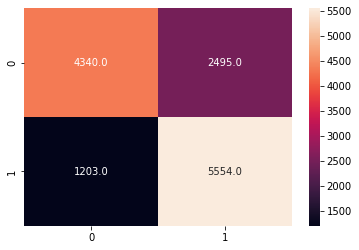

In [ ]:
sns.heatmap(confusion_matrix,annot=True, fmt=".1f")

# **Accuracy Score**

In [ ]:
acc=(accuracy_score(y_test,test_pred_m))
acc

0.7279281930547381

# **Classification Report**

In [ ]:
print(classification_report(y_test,test_pred_m))

              precision    recall  f1-score   support

         0.0       0.78      0.63      0.70      6835
         1.0       0.69      0.82      0.75      6757

    accuracy                           0.73     13592
   macro avg       0.74      0.73      0.73     13592
weighted avg       0.74      0.73      0.73     13592



# **Accuracy Score**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, test_pred_m)



 ROC AUC score: 0.7279281930547381 




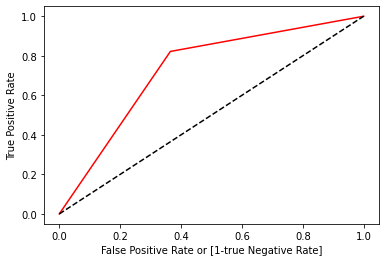

In [ ]:
plt.plot(fpr, tpr, color='red')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1-true Negative Rate]')
plt.ylabel('True Positive Rate')
print(f'\n\n ROC AUC score: {acc} \n\n')